# Marine Debris Detection

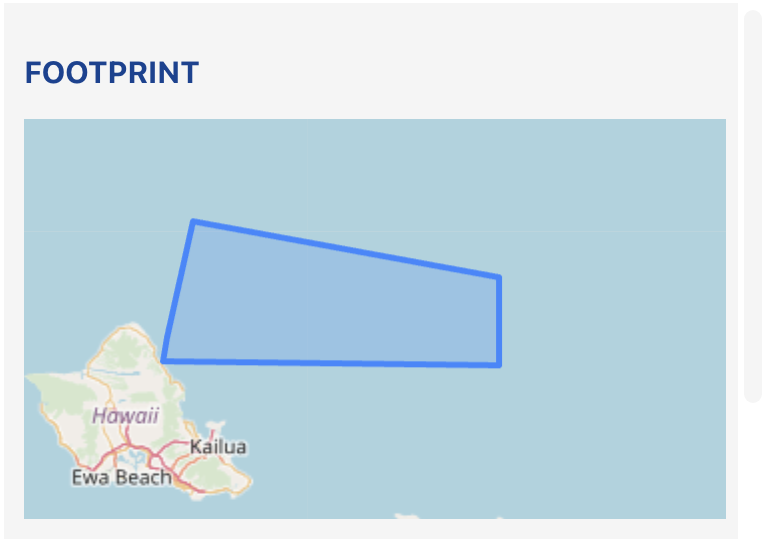

## Import packages

In [1]:
import rasterio
import numpy as np
import pandas as pd

## Define Functions

In [2]:
def calculate_ndsi(green_band, swir_band):
    return (green_band - swir_band) / (green_band + swir_band)

def calculate_mndwi(green_band, swir_band):
    return (green_band - swir_band) / (green_band + swir_band)

def calculate_ndwi(green_band, nir_band):
    return (green_band - nir_band) / (green_band + nir_band)

def calculate_osi(red_band, blue_band):
    return red_band / blue_band

def calculate_fdi(swir_band, nir_band, red_band):
    return swir_band - (nir_band + red_band) / 2

def process_sentinel_data(band1_path, band2_path, band3_path, band4_path, band8_path, band11_path):
    with rasterio.open(band1_path) as band1:
        band1_data = band1.read(1).astype('float32')
        
    with rasterio.open(band2_path) as band2:
        band2_data = band2.read(1).astype('float32')
        transform = band2.transform
        
    with rasterio.open(band3_path) as band3:
        band3_data = band3.read(1).astype('float32')
        
    with rasterio.open(band4_path) as band4:
        band4_data = band4.read(1).astype('float32')

    with rasterio.open(band8_path) as band8:
        band8_data = band8.read(1).astype('float32')
        
    with rasterio.open(band11_path) as band11:
        band11_data = band11.read(1).astype('float32')

    ndsi = calculate_ndsi(band3_data, band11_data)
    mndwi = calculate_mndwi(band3_data, band11_data)
    ndwi = calculate_ndwi(band3_data, band8_data)
    osi = calculate_osi(band4_data, band2_data)
    fdi = calculate_fdi(band11_data, band8_data, band4_data)
    
    return ndsi, mndwi, ndwi, osi, fdi, band1_data, transform

def pixel_to_latlon(transform, x, y):
    lon, lat = rasterio.transform.xy(transform, x, y)
    return lat, lon

def export_to_csv(ndsi, mndwi, ndwi, osi, fdi, band1, transform, output_csv):
    rows, cols = ndsi.shape
    data = []
    
    for row in range(rows):
        for col in range(cols):
            lat, lon = pixel_to_latlon(transform, row, col)
            data.append([lat, lon, ndsi[row, col], mndwi[row, col], ndwi[row, col], osi[row, col], fdi[row, col], band1[row, col]])
    
    df = pd.DataFrame(data, columns=['Latitude', 'Longitude', 'NDSI', 'MNDWI', 'NDWI', 'OSI', 'FDI', 'Band_1'])
    df.to_csv(output_csv, index=False)

## Create Dataframe

In [6]:
# Example file paths to the downloaded Sentinel-2 bands
band1_path = '/work2/09476/connorflynn/frontera/sentinel-data-q1/sentinel_data/B01_20m.jp2'  # Coastal aerosol band
band2_path = '/work2/09476/connorflynn/frontera/sentinel-data-q1/sentinel_data/B02_20m.jp2'  # Blue band
band3_path = '/work2/09476/connorflynn/frontera/sentinel-data-q1/sentinel_data/B03_20m.jp2'  # Green band
band4_path = '/work2/09476/connorflynn/frontera/sentinel-data-q1/sentinel_data/B04_20m.jp2'  # Red band
band8_path = '/work2/09476/connorflynn/frontera/sentinel-data-q1/sentinel_data/B8A_20m.jp2'  # NIR band
band11_path = '/work2/09476/connorflynn/frontera/sentinel-data-q1/sentinel_data/B11_20m.jp2' # SWIR band

# Process the Sentinel-2 data
ndsi, mndwi, ndwi, osi, fdi, band1, transform = process_sentinel_data(band1_path, band2_path, band3_path, band4_path, band8_path, band11_path)

# Export the results to a CSV file
output_csv = '/work2/09476/connorflynn/frontera/sentinel-data-q1/sentinel_data/sentinel_data.csv'
export_to_csv(ndsi, mndwi, ndwi, osi, fdi, band1, transform, output_csv)

print(f"Data exported to {output_csv}")

/opt/apps/intel19/python3/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/opt/apps/intel19/python3/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/opt/apps/intel19/python3/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/opt/apps/intel19/python3/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Data exported to /work2/09476/connorflynn/frontera/sentinel-data-q1/sentinel_data/sentinel_data.csv


In [7]:
sentinel_data = pd.read_csv('/work2/09476/connorflynn/frontera/sentinel-data-q1/sentinel_data/sentinel_data.csv')

In [8]:
sentinel_data

,Latitude,Longitude,NDSI,MNDWI,NDWI,OSI,FDI,Band_1
0,2500010.0,600010.0,NaN,NaN,NaN,NaN,0.0,0.0
1,2500010.0,600030.0,NaN,NaN,NaN,NaN,0.0,0.0
2,2500010.0,600050.0,NaN,NaN,NaN,NaN,0.0,0.0
3,2500010.0,600070.0,NaN,NaN,NaN,NaN,0.0,0.0
4,2500010.0,600090.0,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...
30140095,2390230.0,709710.0,0.032219,0.032219,0.027223,0.862949,-40.0,1326.0
30140096,2390230.0,709730.0,0.012518,0.012518,0.022640,0.918691,-5.0,1386.0
30140097,2390230.0,709750.0,0.021422,0.021422,0.006190,0.965016,-66.5,1444.0
30140098,2390230.0,709770.0,0.022929,0.022929,0.002096,0.886513,-43.5,1327.0


## Examine NA Values

In [10]:
import scikit_na as na

In [11]:
na.summary(sentinel_data)

,Latitude,Longitude,NDSI,MNDWI,NDWI,OSI,FDI,Band_1
NA count,0.0,0.0,22738056.00,22738056.00,22738056.00,22738056.00,0.0,0.0
"NA, % (per column)",0.0,0.0,75.44,75.44,75.44,75.44,0.0,0.0
"NA, % (of all NAs)",0.0,0.0,25.00,25.00,25.00,25.00,0.0,0.0
NA unique (per column),0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0
"NA unique, % (per column)",0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0
Rows left after dropna(),30140100.0,30140100.0,7402044.00,7402044.00,7402044.00,7402044.00,30140100.0,30140100.0
"Rows left after dropna(), %",100.0,100.0,24.56,24.56,24.56,24.56,100.0,100.0


In [12]:
sentinel_data_no_na = sentinel_data.dropna()

In [14]:
na.summary(sentinel_data_no_na)

,Latitude,Longitude,NDSI,MNDWI,NDWI,OSI,FDI,Band_1
NA count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"NA, % (per column)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"NA, % (of all NAs)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NA unique (per column),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"NA unique, % (per column)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rows left after dropna(),7402044.0,7402044.0,7402044.0,7402044.0,7402044.0,7402044.0,7402044.0,7402044.0
"Rows left after dropna(), %",100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [15]:
# Define the file path where you want to save the CSV file
output_path = '/work2/09476/connorflynn/frontera/sentinel-data-q1/sentinel_data/sentinel_data_no_na.csv'

# Write the DataFrame to a CSV file
sentinel_data_no_na.to_csv(output_path, index=False)

print(f"DataFrame saved to {output_path}")

DataFrame saved to /work2/09476/connorflynn/frontera/sentinel-data-q1/sentinel_data/sentinel_data_no_na.csv


In [ ]:
#sentinel_data_no_na = pd.read_csv('/work2/09476/connorflynn/frontera/sentinel-data-q1/sentinel_data/sentinel_data_no_na.csv')

## Look at Distributions by Measurement

In [18]:
import seaborn as sns

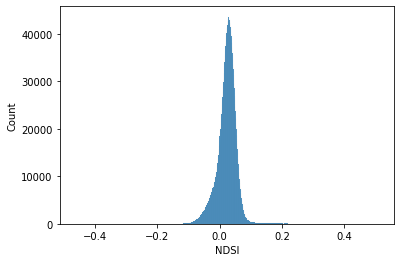

In [19]:
sns.histplot(data=sentinel_data_no_na, x="NDSI")

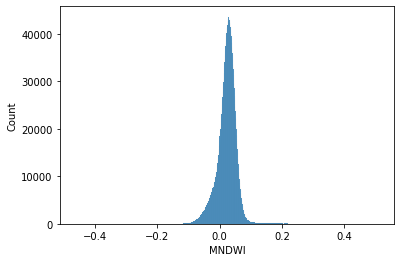

In [20]:
sns.histplot(data=sentinel_data_no_na, x="MNDWI")

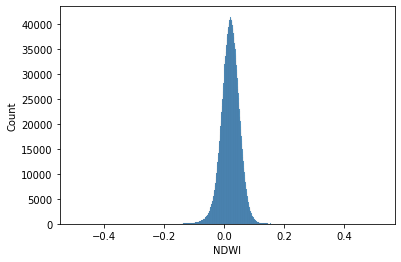

In [21]:
sns.histplot(data=sentinel_data_no_na, x="NDWI")

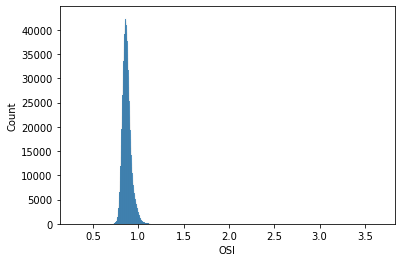

In [22]:
sns.histplot(data=sentinel_data_no_na, x="OSI")

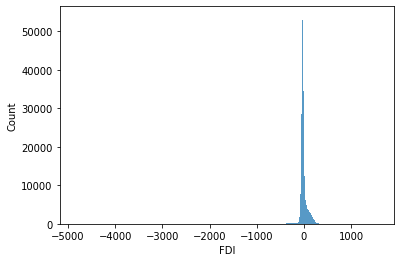

In [23]:
sns.histplot(data=sentinel_data_no_na, x="FDI")

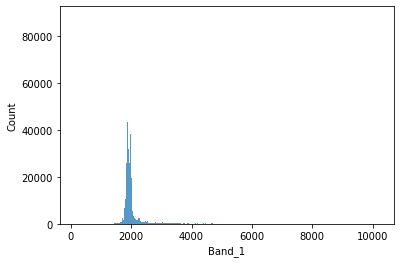

In [24]:
sns.histplot(data=sentinel_data_no_na, x="Band_1")

## Next Steps
- Clone Git Repo
- Get Data from Connor and move it into work
- Make a copy of this file and save as query1-analysis-YOURNAME
- Train the model using the data from the paper